**Statictics**
Histogram, barplot,pie chart, pdf, cdf are used to analyze data.
Descriptive Stats:
    central tendency = mean, median, mod
    Measure of Variants = Standard deviation {The standard deviation is the average amount of variability in your dataset. It tells you, on average, how far each value lies from the mean},
    variants {variance measures how far each number in the set is from the mean and thus from every other number in the set}

Inferential Stas:
    Descriptive statistics describes data (for example, a chart or graph) and inferential statistics allows you to make predictions (“inferences”) 
    Confidence Intervals:
        Z test, T test, Chi test
        

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr

In [22]:
#Make a Data Frame
df = pd.DataFrame(dict(id = range(1,101), income = np.random.randint(1000, 5000, size=100) ))
#df.to_stata(index = False, header = False)
print(df.to_string(index=False))


 id  income
  1    2296
  2    4823
  3    2924
  4    2590
  5    1462
  6    4602
  7    2112
  8    1906
  9    2072
 10    3985
 11    2259
 12    2352
 13    1246
 14    1716
 15    4245
 16    4877
 17    1809
 18    4093
 19    2620
 20    1023
 21    2949
 22    3852
 23    2949
 24    3811
 25    4835
 26    1036
 27    3970
 28    1097
 29    4596
 30    4419
 31    4448
 32    4386
 33    4025
 34    3427
 35    2906
 36    3625
 37    2903
 38    1419
 39    4383
 40    1263
 41    1199
 42    1265
 43    2275
 44    4120
 45    3522
 46    4796
 47    1448
 48    4546
 49    4711
 50    1294
 51    1386
 52    3373
 53    1118
 54    1526
 55    3227
 56    3874
 57    4742
 58    3845
 59    4391
 60    2265
 61    1322
 62    3889
 63    3598
 64    2652
 65    2917
 66    1199
 67    1951
 68    3775
 69    3827
 70    1389
 71    1230
 72    1847
 73    2690
 74    3703
 75    1996
 76    3393
 77    2649
 78    2484
 79    1568
 80    3411
 81    4633
 82    2086
 83 

In [54]:
print("Mean of Income: ",df["income"].mean())
print("Median of Income: ",df["income"].median())
print("Mode of Income: ",df["income"].mode())
print("Variance of Income: ",df["income"].var())
print("Standard deviation ",df["income"].std())
print("Max INcome ",df["income"].max())
print("Min INcome ",df["income"].min())

Mean of Income:  2921.19
Median of Income:  2936.5
Mode of Income:  0    1199
1    2949
2    3227
3    3427
Name: income, dtype: int32
Variance of Income:  1418354.0140404042
Standard deviation  1190.9466881604753
Max INcome  4877
Min INcome  1023


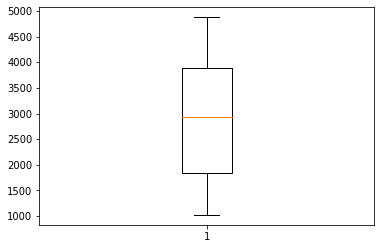

In [31]:
#df.boxplot(column = "income" , return type = 'axes')
plt.boxplot(df.income)
plt.show()

In [52]:
for x in range(100):
    sample = np.random.choice(a= df.income,size=50)

print(sample)
    

[2949 3373 1716 1716 1568 2949 3411 1023 3970 1448 1809 3831 3775 2949
 3775 1847 3427 3775 2903 3970 2112 2652 1716 1199 2484 4025 1526 1322
 1263 4448 4796 4742 2265 1568 1386 4711 2949 3831 3874 2949 2924 2949
 4536 1294 4596 4093 2607 3427 3985 3768]


In [53]:
print(sample.mean())
print(df.income.mean())

2923.62
2921.19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

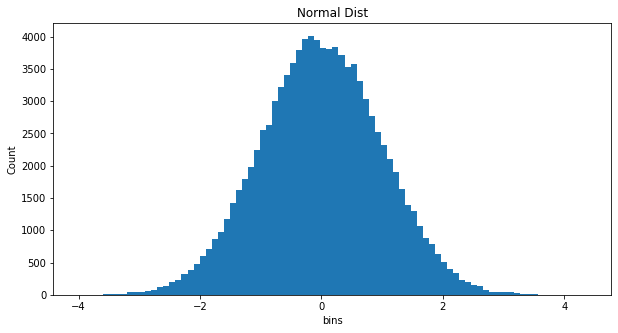

In [2]:
dt = np.random.normal(loc = 0.0, scale=1.0,size=(100000))
fig,axes = plt.subplots(figsize = (10,5))
axes.hist(dt,bins = 84)
axes.set_title("Normal Dist")
axes.set_xlabel("bins")
axes.set_ylabel("Count")


In [8]:
data1=pd.read_csv('test.csv',usecols=['Age','Fare','Sex'])
data1.head()
data1.isnull().sum()

Sex      0
Age     86
Fare     1
dtype: int64

In [9]:
def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [12]:
data1['Age'] = impute_na(data1,'Age')
data1['Fare'] = impute_na(data1,'Fare')
data1.isnull().sum()

Sex     0
Age     0
Fare    0
dtype: int64

In [88]:
#In log normal we add log in x axis to make it like normal distribution
df1 = pd.read_csv(
    "income.csv", 
    index_col=None, 
    names=["income","count"], 
    skiprows=1
)
df1.head()

,income,count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


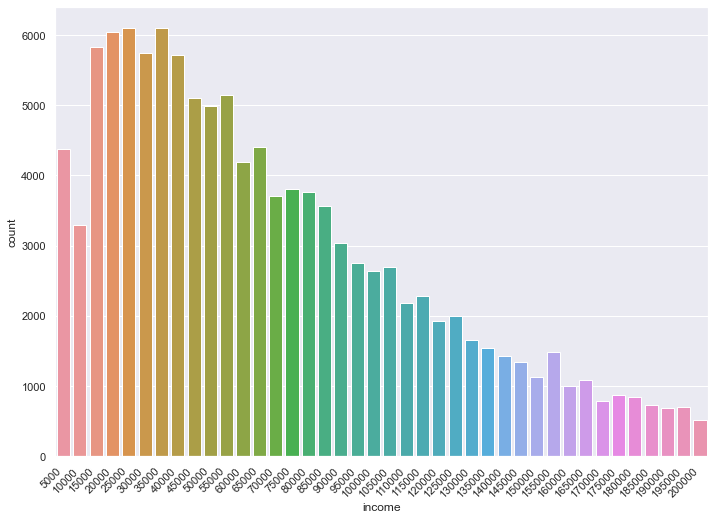

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income',y='count',data=df1)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');

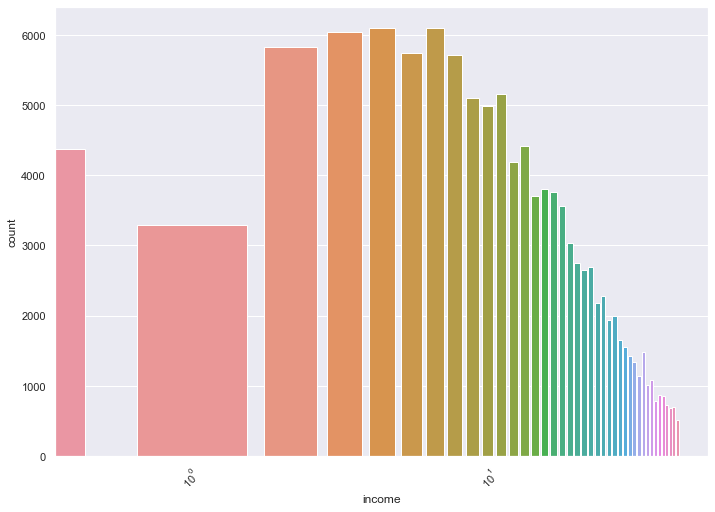

In [96]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income',y='count',data=df1)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');
g.set(xscale="log");

**CoVariance**
https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/covariance/

**Random Variables**
https://corporatefinanceinstitute.com/resources/knowledge/other/random-variable/

**Central Limit Theorem**
https://statisticsbyjim.com/basics/central-limit-theorem/

3.999692341428737


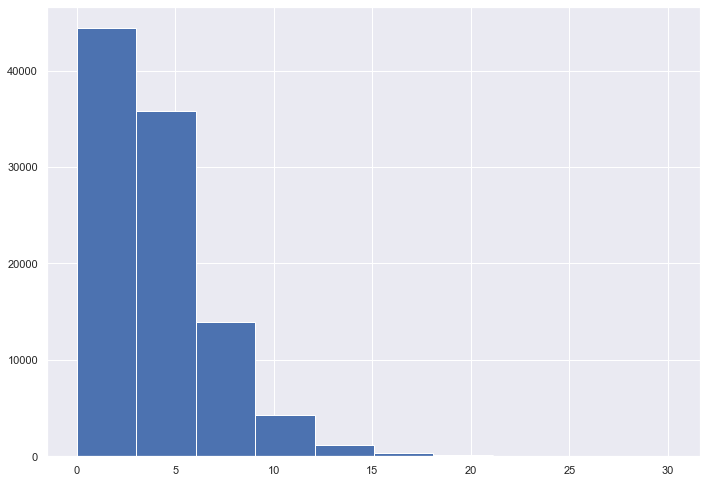

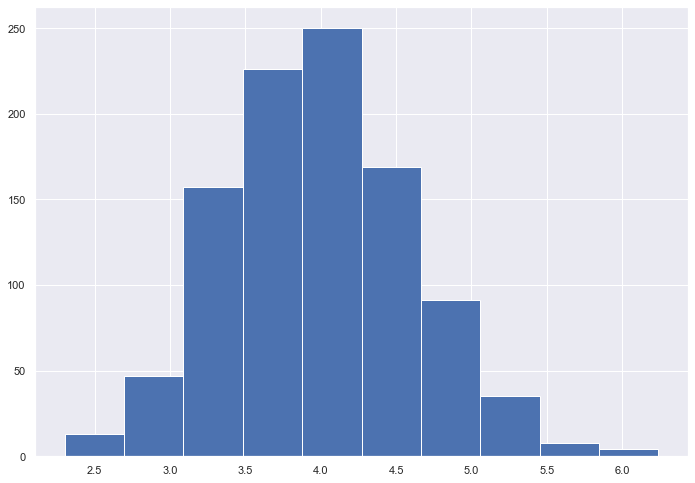

In [101]:

shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
import random
s = np.random.gamma(shape, scale, 100000)
print(np.mean(s))
import matplotlib.pyplot as plt
import scipy.special as sps
plt.hist(s)
plt.show()


# The distribution of the means from the sampled groups is normally distributed
samples = [ np.mean(random.choices(s, k=20)) for _ in range(1000) ]
plt.hist(samples)
plt.show()

**Chebyshev's InEquality**
https://corporatefinanceinstitute.com/resources/knowledge/data-analysis/chebyshevs-inequality/

**Pearson Correlation Coefficient**
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
https://www.youtube.com/watch?v=6fUYt1alA1U

**Spearman's rank correlation coefficient- Statistics**
https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#:~:text=%2C%20is%20a%20nonparametric%20measure%20of,described%20using%20a%20monotonic%20function.
https://www.youtube.com/watch?v=CIQ3u7CvOEU

In [5]:
dtf = pd.read_csv("test.csv")
newdtf = dtf[['Age','Fare']].dropna()
newdtf.corr()

<IPython.core.display.Javascript object>

,Age,Fare
Age,1.000000,0.337932
Fare,0.337932,1.000000


In [15]:
pearsonr(data1['Age'],data1['Fare'])

(0.2843282059680243, 3.2532115570395807e-09)

**Finding Outliers in Dataset using Z**
*criteria to identify an outlier:*
    Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
    Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

*impacts of having outliers in a dataset:*
    It causes various problems during our statistical analysis
    It may cause a significant impact on the mean and the standard deviation
Standard Normal Distribution , after 3rd Deviation all data are Outliers

**Z score**
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

**InterQuantile Range**
75%- 25% values in a dataset

Steps:
    1. Arrange the data in increasing order
    2. Calculate first(q1) and third quartile(q3)
    3. Find interquartile range (q3-q1)
    4.Find lower bound q1*1.5
    5.Find upper bound q3*1.5


In [2]:
dtset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
print(dtset)

[11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]


In [130]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [131]:
outlier_pt=detect_outliers(dtset)
print(outlier_pt)

[102, 107, 108]


In [132]:
sorted(dtset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [3]:
quantile1, quantile3= np.percentile(dtset,[25,75])
print(quantile1,quantile3)
## Find the IQR
iqr_value=quantile3-quantile1
print("IQR:",iqr_value)
print(dtset)

<IPython.core.display.Javascript object>

12.0 15.0
IQR: 3.0
[11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]


In [138]:
lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 
print(lower_bound_val,upper_bound_val)

7.5 19.5


In [151]:
for i in dtset:
    if(i<lower_bound_val or i>upper_bound_val):
        print("OutLiers: ",i)

OutLiers:  102
OutLiers:  107
OutLiers:  108


In [153]:
#Without Outliers
for i in dtset:
    if(i>lower_bound_val and i<upper_bound_val):
        print(i)

11
10
12
14
12
15
14
13
15
12
14
17
19
10
13
12
14
12
12
11
14
13
15
10
15
12
10
14
13
15
10
